# Pytorch: Tensors
https://pytorch.org/tutorials/beginner/examples_tensor/polynomial_tensor.html

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Softwares\Python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['dtype']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +



PyTorch: Tensors
----------------

A third order polynomial, trained to predict $y=\sin(x)$ from $-\pi$
to $pi$ by minimizing squared Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass,
loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know
anything about deep learning or computational graphs or gradients, and is just
a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that
a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU,
just cast the Tensor to a cuda datatype.



In [36]:
import math
import torch


dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device = device, dtype = dtype)
y = torch.sin(x)

In [37]:
# Randomly initialize weights
a = torch.randn((), device = device, dtype = dtype)
b = torch.randn((), device = device, dtype = dtype)
c = torch.randn((), device = device, dtype = dtype)
d = torch.randn((), device = device, dtype = dtype)

learning_rate = 1e-6

for t in range(2000):
    
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x ** 0).sum()
    grad_b = (grad_y_pred * x ** 1).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} * x + {c.item()} * x**2 + {d.item()} * x**3')

99 1033.9027099609375
199 690.0274658203125
299 461.654052734375
399 309.94439697265625
499 209.13272094726562
599 142.12161254882812
699 97.563232421875
799 67.924072265625
899 48.201324462890625
999 35.07200241088867
1099 26.32817840576172
1199 20.502532958984375
1299 16.619266510009766
1399 14.029478073120117
1499 12.301450729370117
1599 11.147783279418945
1699 10.377132415771484
1799 9.862031936645508
1899 9.51753044128418
1999 9.286958694458008
Result: y = -0.01068209484219551 + 0.8380943536758423 * x + 0.0018428376642987132 * x**2 + -0.09067808091640472 * x**3


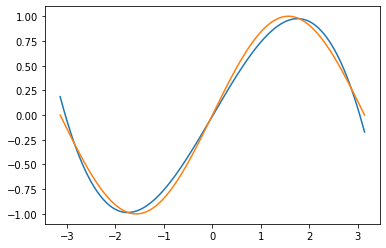

In [38]:
y = a + b * x + c * x ** 2 + d * x ** 3

plt.plot(x.cpu(), y.cpu()); 
plt.plot(x.cpu(), np.sin(x.cpu()));